<h4>Import libraries</h4>

In [2]:
import os
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing     import StandardScaler, MinMaxScaler
from sklearn.model_selection   import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.spatial             import distance
from sklearn.cluster           import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.datasets          import load_iris, make_moons
from sklearn.metrics           import silhouette_score, pairwise_distances

<h5>house keeping params</h5>

In [4]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.25

<Figure size 1500x700 with 0 Axes>

<h4></h4>

<h4>Get some data too</h4>

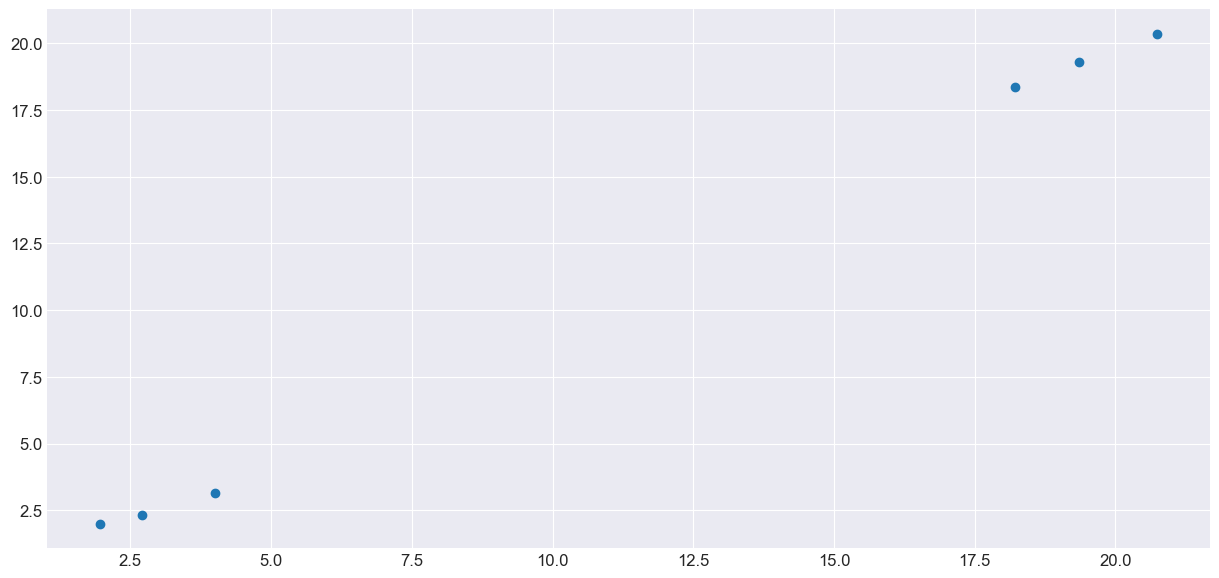

In [7]:
rnd = np.random.RandomState(RANDOM_STATE)

x_axis = np.array([1,2,3,18,19,20]) + rnd.uniform(0,1, size = 6)
y_axis = np.array([1,2,3,18,19,20]) + rnd.uniform(0,1, size = 6)

data_df = pd.DataFrame({'x': x_axis, 'y':y_axis})
plt.scatter(x_axis, y_axis);

Text(0.5, 1.0, 'average linkage')

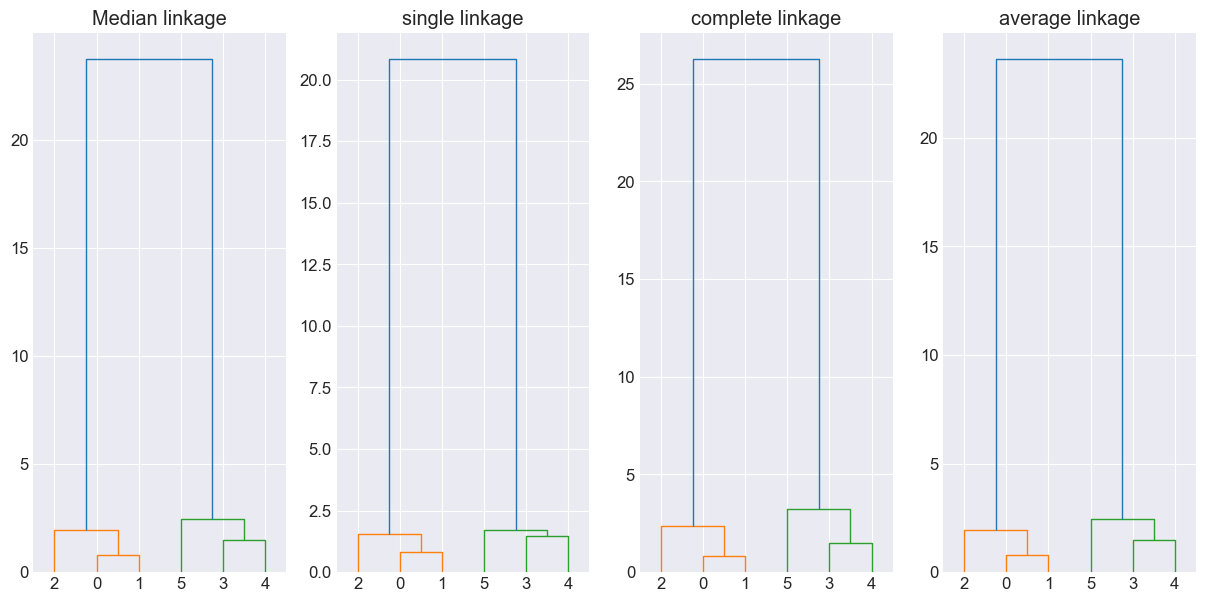

In [8]:
fig, axes =plt.subplots(1,4)

#finding centroid by median
# centroid  median of the point
Z_median = sch.linkage(data_df, method = 'median')

# shortest distance between any two points
Z_single = sch.linkage(data_df, method = 'single')

#Maximum distance  between two points
Z_complete = sch.linkage(data_df, method = 'complete')

#Average distance  between two points
Z_avg = sch.linkage(data_df, method = 'average')

ax = axes[0]
den = sch.dendrogram(Z_median, ax = ax)
ax.set_title("Median linkage")

ax = axes[1]
den = sch.dendrogram(Z_single, ax = ax)
ax.set_title("single linkage")

ax = axes[2]
den = sch.dendrogram(Z_complete, ax = ax)
ax.set_title("complete linkage")

ax = axes[3]
den = sch.dendrogram(Z_avg, ax = ax)
ax.set_title("average linkage")



<h4>Agglomerative Clustering</h4>

In [10]:
cluster_H = AgglomerativeClustering(n_clusters = 2, linkage = "average")

model_cluster = cluster_H.fit(data_df)

display(model_cluster)

AgglomerativeClustering(linkage='average')

In [11]:
data_df['cluster'] = model_cluster.labels_

data_df

,x,y,cluster
0,1.960017,1.996456,1
1,2.699512,2.316347,1
2,3.999867,3.136545,1
3,18.220067,18.383980,0
4,19.361056,19.320519,0
5,20.739841,20.366415,0


<h4>with iris dataset</h4>

In [13]:
iris = load_iris()

In [14]:
iris_df = pd.DataFrame(iris.data) # create using feature
iris_df.columns = iris.feature_names # add column names
iris_df['labels'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


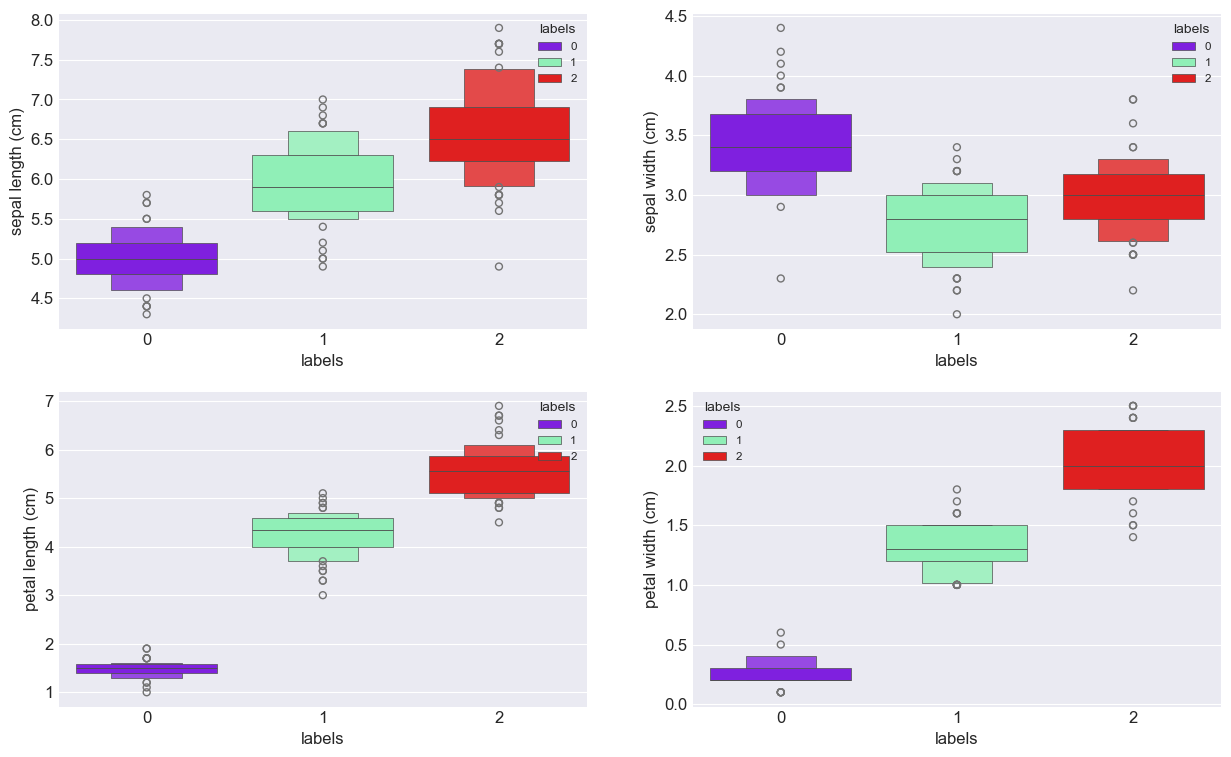

In [15]:
plt.figure(figsize=(15,9))

for count, col in enumerate(iris.feature_names):
    plt.subplot(2,2, count+1)
    sns.boxenplot(data=iris_df, y = col, 
                     x = iris_df.labels, hue = iris_df.labels, palette = CMAP)

In [16]:
feature_df = pd.DataFrame(iris.data)

Text(0.5, 1.0, 'average linkage')

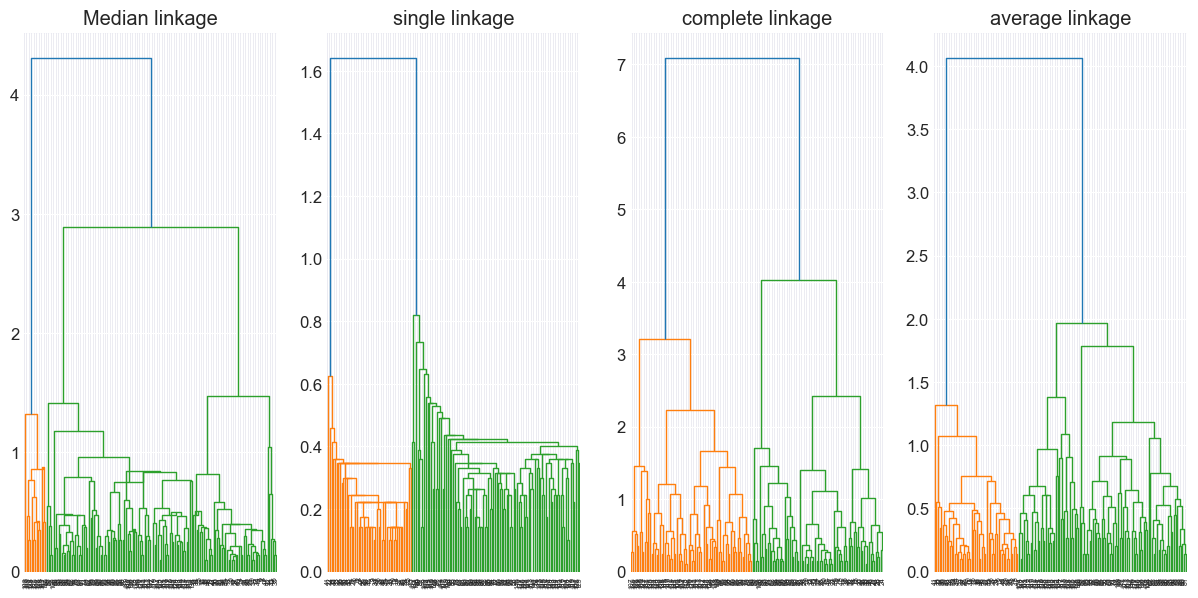

In [17]:
fig, axes =plt.subplots(1,4)

#finding centroid by median
# centroid  median of the point
Z_median = sch.linkage(feature_df, method = 'median')

# shortest distance between any two points
Z_single = sch.linkage(feature_df, method = 'single')

#Maximum distance  between two points
Z_complete = sch.linkage(feature_df, method = 'complete')

#Average distance  between two points
Z_avg = sch.linkage(feature_df, method = 'average')

ax = axes[0]
den = sch.dendrogram(Z_median, ax = ax)
ax.set_title("Median linkage")

ax = axes[1]
den = sch.dendrogram(Z_single, ax = ax)
ax.set_title("single linkage")

ax = axes[2]
den = sch.dendrogram(Z_complete, ax = ax)
ax.set_title("complete linkage")

ax = axes[3]
den = sch.dendrogram(Z_avg, ax = ax)
ax.set_title("average linkage")

In [18]:
sil_score_max = 0
for k in range(2, 10):
    
    cluster_H = AgglomerativeClustering(n_clusters = k, linkage = "average")

    model_cluster = cluster_H.fit(feature_df)

    label = model_cluster.labels_

    sil_coeff = silhouette_score(feature_df, label, metric='euclidean')
    if sil_coeff >  sil_score_max:
        sil_score_max = sil_coeff
        best_k = k

    print(f'For cluster:{k}, Sil Coeff:{sil_coeff:0.5f}')



For cluster:2, Sil Coeff:0.68674
For cluster:3, Sil Coeff:0.55416
For cluster:4, Sil Coeff:0.47199
For cluster:5, Sil Coeff:0.43067
For cluster:6, Sil Coeff:0.34199
For cluster:7, Sil Coeff:0.37074
For cluster:8, Sil Coeff:0.36588
For cluster:9, Sil Coeff:0.31668


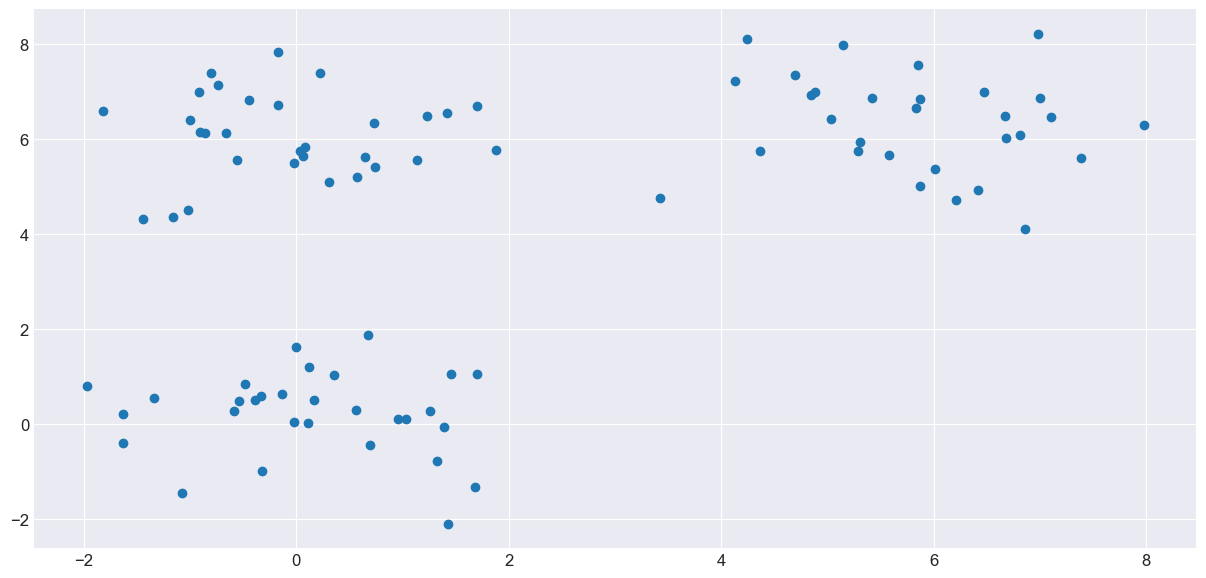

In [19]:
D = 2
s= 6
mu1 = [0,0]
mu2=[s,s]
mu3=[0,s]

N= 90
X= np.zeros((N,D))
X[:30,:] =np.random.randn(30, D) + mu1
X[30:60,:] =np.random.randn(30, D) + mu2
X[60:,:] =np.random.randn(30, D) + mu3
plt.scatter(X[:,0], X[:, 1])

Text(0.5, 1.0, 'average linkage')

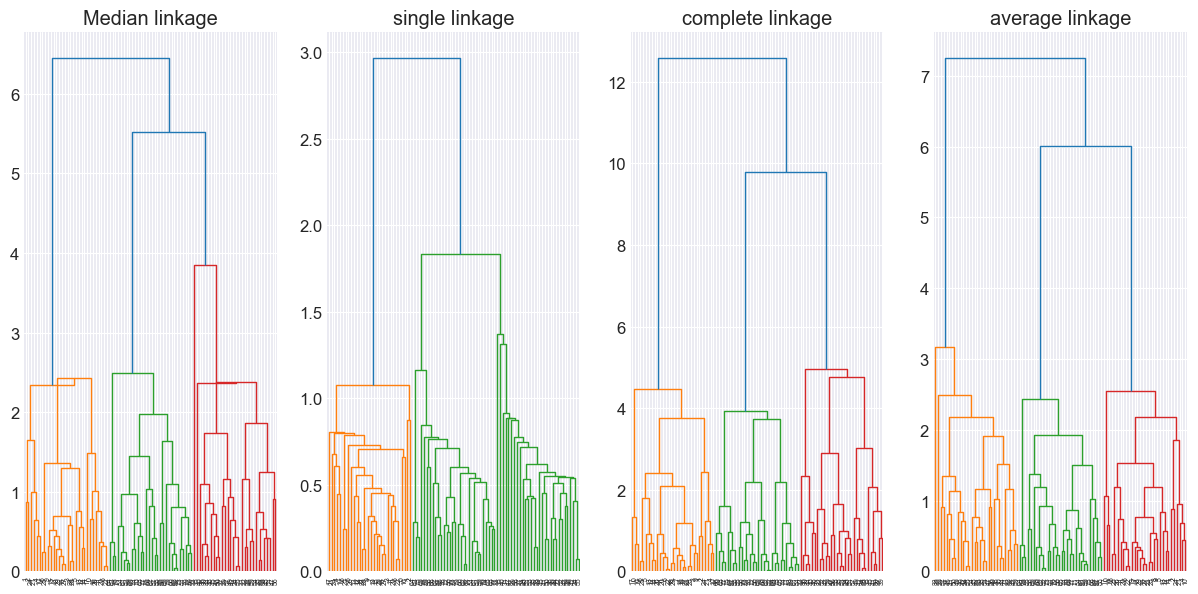

In [20]:
fig, axes =plt.subplots(1,4)

#finding centroid by median
# centroid  median of the point
Z_median = sch.linkage(X, method = 'median')

# shortest distance between any two points
Z_single = sch.linkage(X, method = 'single')

#Maximum distance  between two points
Z_complete = sch.linkage(X, method = 'complete')

#Average distance  between two points
Z_avg = sch.linkage(X, method = 'average')

ax = axes[0]
den = sch.dendrogram(Z_median, ax = ax)
ax.set_title("Median linkage")

ax = axes[1]
den = sch.dendrogram(Z_single, ax = ax)
ax.set_title("single linkage")

ax = axes[2]
den = sch.dendrogram(Z_complete, ax = ax)
ax.set_title("complete linkage")

ax = axes[3]
den = sch.dendrogram(Z_avg, ax = ax)
ax.set_title("average linkage")

In [36]:
sil_score_max = 0
for k in range(2, 10):
    
    cluster_H = AgglomerativeClustering(n_clusters = k, linkage = "average")

    model_cluster = cluster_H.fit(X)

    label = model_cluster.labels_

    sil_coeff = silhouette_score(X, label, metric='euclidean')
    if sil_coeff >  sil_score_max:
        sil_score_max = sil_coeff
        best_k = k

    print(f'For cluster:{k}, Sil Coeff:{sil_coeff:0.5f}')


For cluster:2, Sil Coeff:0.53616
For cluster:3, Sil Coeff:0.69015
For cluster:4, Sil Coeff:0.53350
For cluster:5, Sil Coeff:0.43024
For cluster:6, Sil Coeff:0.35652
For cluster:7, Sil Coeff:0.30370
For cluster:8, Sil Coeff:0.34376
For cluster:9, Sil Coeff:0.34175


In [40]:
kmean = KMeans(n_clusters=3, random_state=RANDOM_STATE)

kmean.fit(X)

y_pred = kmean.predict(X)

kmean.cluster_centers_

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[-0.06278398,  6.06818472],
       [ 0.15030922,  0.22537134],
       [ 5.81246014,  6.33808756]])

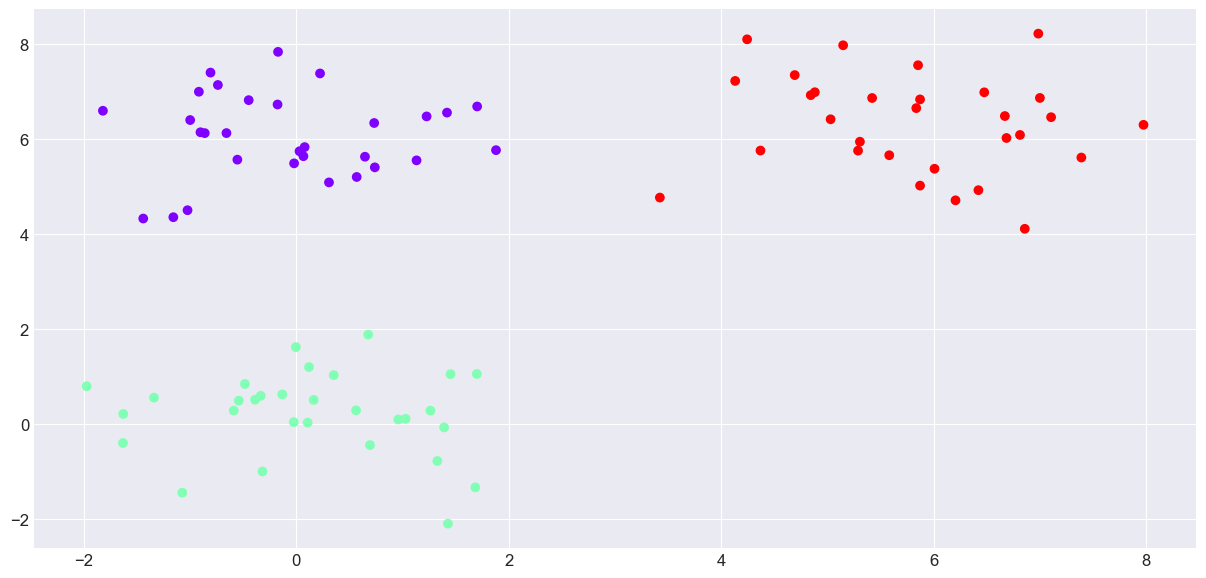

In [42]:
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:, 1], c = y_pred, cmap='rainbow')

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

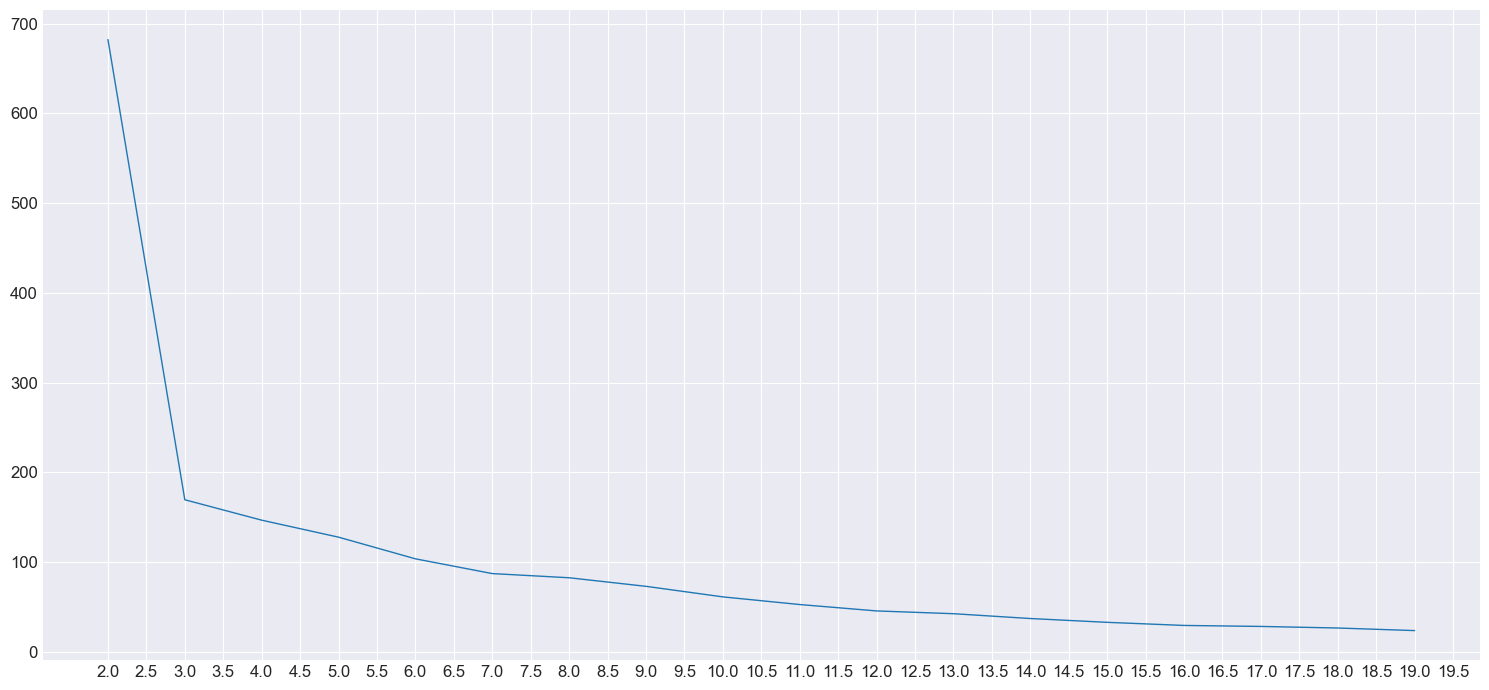

In [52]:
    sse = {}
    for k in range(2,20):
        kmeans = KMeans(n_clusters= k, random_state=RANDOM_STATE)
        kmeans.fit(X)
        sse[k] = kmeans.inertia_

    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xticks(np.arange(2,20,0.5));
plt.tight_layout()

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

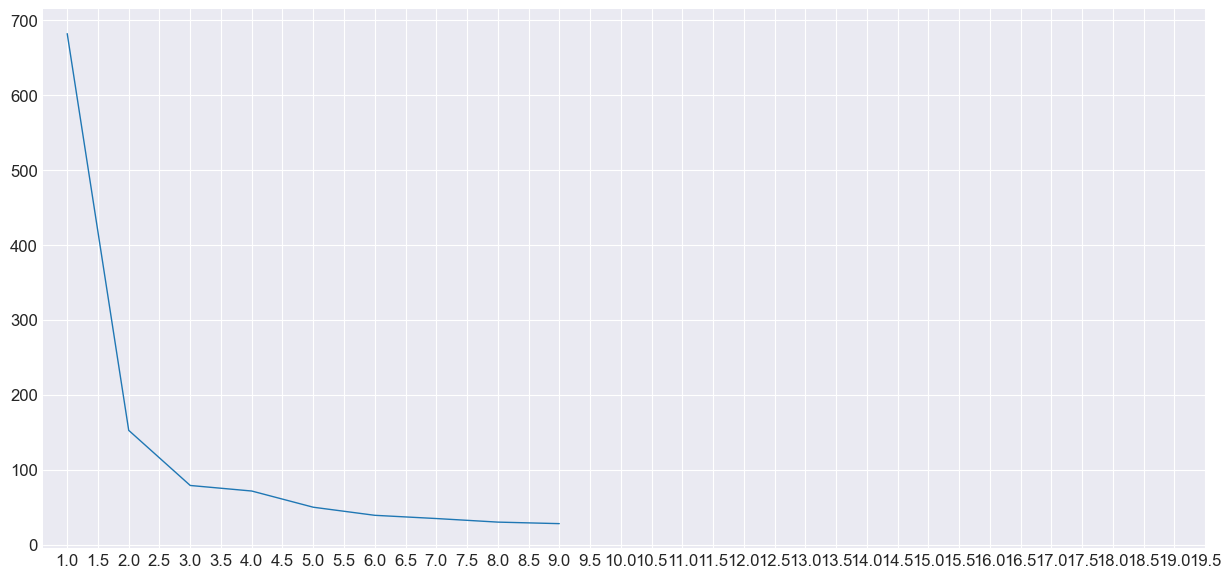

In [58]:
    sse = {}
    for k in range(1,10):
        kmeans = KMeans(n_clusters= k, random_state=RANDOM_STATE)
        kmeans.fit(feature_df)
        sse[k] = kmeans.inertia_

    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xticks(np.arange(1,20,0.5));

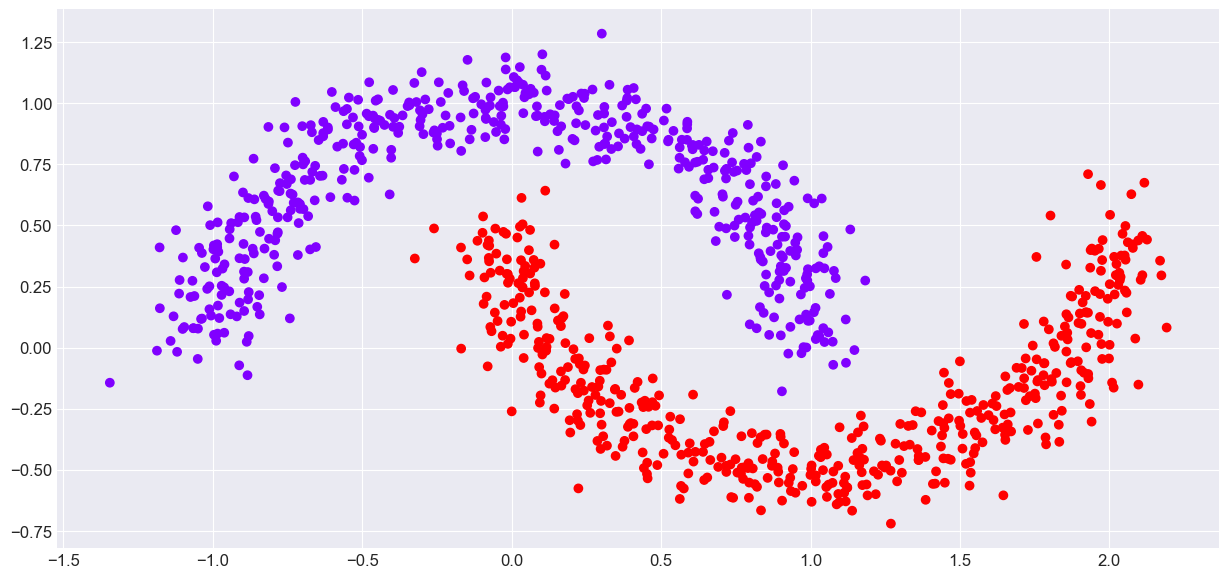

In [68]:
X ,y = make_moons(n_samples=N_SAMPLES, 
                  shuffle=True, 
                  noise=NOISE, 
                  random_state=RANDOM_STATE)

plt.scatter(X[:,0], X[:,1], c = y, cmap =CMAP)

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


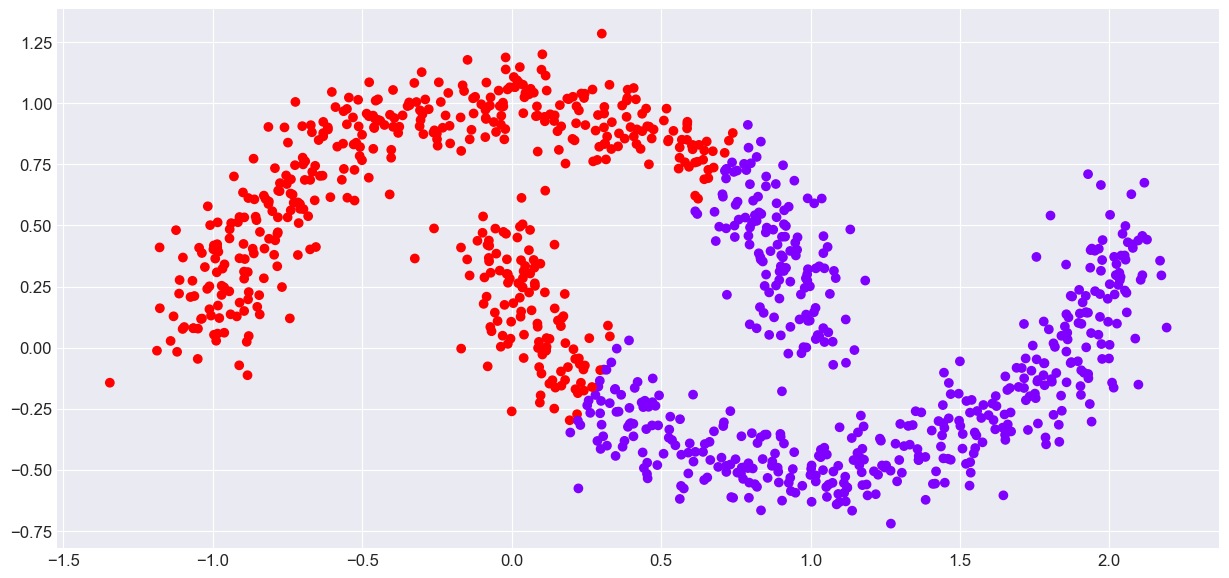

In [80]:
kmean = KMeans(n_clusters=2, random_state=RANDOM_STATE)

kmean.fit(X)

y_pred = kmean.predict(X)

plt.scatter(X[:,0], X[:,1], c = y_pred, cmap =CMAP)

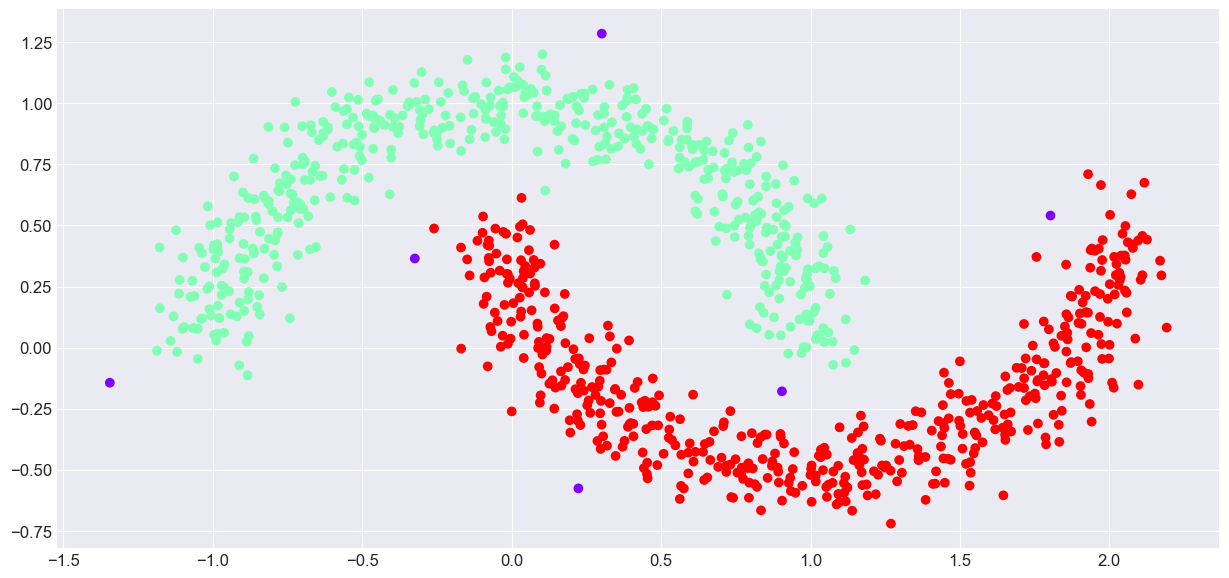

In [88]:
clustering = DBSCAN(eps= 0.15, min_samples=5).fit(X)

y_pred = clustering.labels_

plt.scatter(X[:,0], X[:,1], c = y_pred, cmap =CMAP)